<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/Combina%C3%A7%C3%A3oModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Combinação de Modelos**

#Importação dos Dados

In [ ]:
import pandas as pd

In [ ]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [ ]:
dados.describe().round(4)

,age,bmi,children,charges
count,1338.000,1338.0000,1338.0000,1338.0000
mean,39.207,30.6634,1.0949,13270.4223
std,14.050,6.0982,1.2055,12110.0112
min,18.000,15.9600,0.0000,1121.8739
25%,27.000,26.2962,0.0000,4740.2872
50%,39.000,30.4000,1.0000,9382.0330
75%,51.000,34.6938,2.0000,16639.9125
max,64.000,53.1300,5.0000,63770.4280


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes':1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
import seaborn as sns

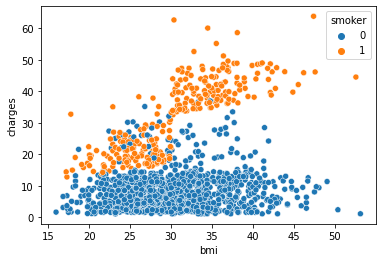

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

#**Validação Cruzada**

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

In [ ]:
#Configuração da Validação Cruzada

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [ ]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#**Regressão Logística**

In [ ]:
modelo = LogisticRegression()
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9325070138031647

#**KNN**

In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9609050611603636

#**Árvore de Decisão**

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.961436987992369

#**Combinação por Votos Hard**

In [ ]:
#Combinação por votos 'Hard'
#Considera a predição de cada modelo

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9640478060823701

#**Gráfico de Região**

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


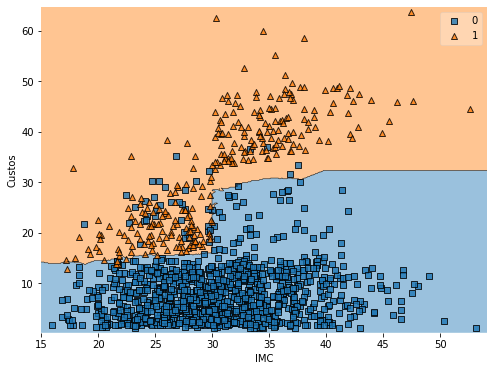

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

#**Combinação por Votos Soft**

In [ ]:
#Combinação por votos 'Soft'
#Considera a média de predição de cada modelo

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9648759959600492

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


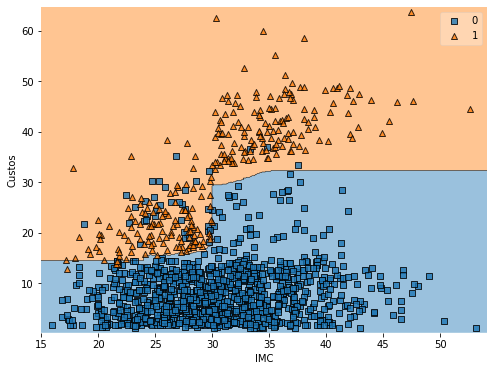

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

#**Método Bagging**

In [ ]:
#Regressão Logística

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod6 = accs.mean()
print(mod6)

#n_estimators é o número de réplicas bootstrap

0.9323571989675681


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


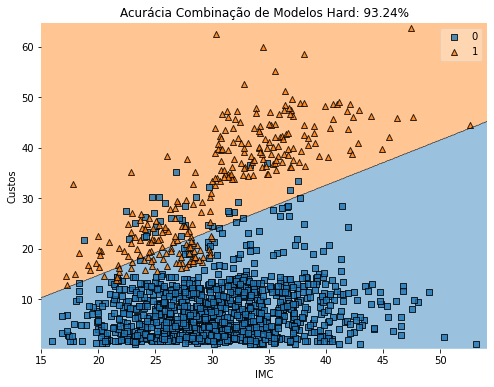

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod6))  
plt.show()

In [ ]:
#KNN

from sklearn.ensemble import BaggingClassifier

#modelo_base = LogisticRegression()
modelo_base = KNeighborsClassifier(n_neighbors = 15)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod6 = accs.mean()
print(mod6)

#n_estimators é o número de réplicas bootstrap

0.9603877230389406


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


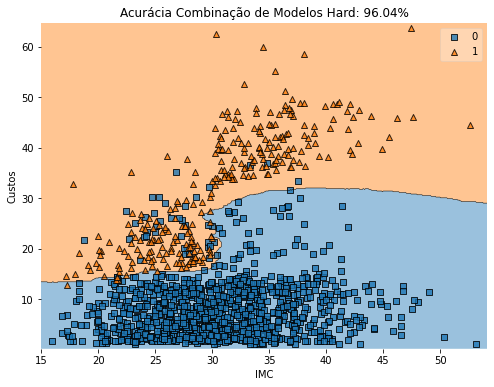

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod6))  
plt.show()

In [ ]:
#Árvore de Decisão

from sklearn.ensemble import BaggingClassifier

#modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 15)
modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod6 = accs.mean()
print(mod6)

#n_estimators é o número de réplicas bootstrap

0.9639002356637865


In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod6))  
plt.show()

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

In [ ]:
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod7 = accs.mean()
print(mod7)

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod7))  
plt.show()

#**Mais Métricas de Classificação**

#Validação do Modelo: Queremos apenas escolher o melhor modelo ou também saber o seu erro de generalização?

In [ ]:
modelo = VotingClassifier (modelos, voting = 'soft')
modelo.fit(X, y)
preditos = modelo.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
mc = confusion_matrix(y, preditos)

In [ ]:
mc

In [ ]:
def MetricasClassBinaria(y, preditos):
    from sklearn.metrics import confusion_matrix
    mc = confusion_matrix(y, preditos)
    vn, fp, fn, vp = mc.flatten()

    pre = y.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [ ]:
m = MetricasClassBinaria(y, preditos)

#**Divisão em Teste x Treinamento**

In [ ]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.20)

##**Regressão Logística**

In [ ]:
modelo = LogisticRegression()
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas1 = MetricasClassBinaria(Yteste, preditos)

##**KNN**


In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas2 = MetricasClassBinaria(Yteste, preditos)

##**Árvore de Decisão**

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas3 = MetricasClassBinaria(Yteste, preditos)

##**Combinação de Votos - HARD**

In [ ]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'hard')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas4 = MetricasClassBinaria(Yteste, preditos)

##**Combinação de Votos - SOFT**

In [ ]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'soft')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas5 = MetricasClassBinaria(Yteste, preditos)

#**Bagging**

In [ ]:
modelo = BaggingClassifier(n_estimators = 100)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas6 = MetricasClassBinaria(Yteste, preditos)

#**Random Forest**

In [ ]:
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 7) 
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas7 = MetricasClassBinaria(Yteste, preditos)

#**Compilação dos Resultados**

In [ ]:
resultados0 = {'Regressão Logística': list(metricas1.values()),
              '25-Vizinhos + Próximos': list(metricas2.values()),
              'Árvore de Decisão': list(metricas3.values()),
              'Combinação Hard': list(metricas4.values()),
              'Combinação Soft': list(metricas5.values()),
              'Bagging': list(metricas6.values()),
              'Random Forest': list(metricas7.values())}
              
resultados = pd.DataFrame(resultados0, index = metricas1.keys()).T
resultados

In [ ]:
resultados.sort_values(by = 'acurácia', ascending = False)

In [ ]:
resultados.sort_values(by = 'vpp', ascending = False)

In [ ]:
from google.colab.data_table import DataTable
DataTable(resultados.round(4))